In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml

%matplotlib inline

In [2]:
order_products = pd.read_csv("../../data/external/order_products__train.csv")
order_products_prior = pd.read_csv("../../data/external/order_products__prior.csv")
orders = pd.read_csv("../../data/external/orders.csv")
products = pd.read_csv("../../data/external/products.csv")
aisles = pd.read_csv("../../data/external/aisles.csv")
departments = pd.read_csv("../../data/external/departments.csv")

In [3]:
products.set_index('product_id', inplace=True)
orders.set_index('order_id', inplace=True)
aisles.set_index('aisle_id', inplace=True)
departments.set_index('department_id', inplace=True)

In [4]:
order_products = pd.concat([order_products, order_products_prior])

In [5]:
products.dtypes

product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [6]:
products.head()

,product_name,aisle_id,department_id
product_id,,,
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
5,Green Chile Anytime Sauce,5,13


In [7]:
orders.head()

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,NaN
2398795,1,prior,2,3,7,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,7,29.0
431534,1,prior,5,4,15,28.0


In [8]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
aisles.head()

,aisle
aisle_id,
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods
5,marinades meat preparation


In [10]:
departments.head()

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [11]:
products.nunique()

product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [12]:
products.groupby('department_id').nunique()[['product_name', 'aisle_id']]

,product_name,aisle_id
department_id,,
1,4007,11
2,548,1
3,1516,5
4,1684,5
5,1054,5
6,1139,4
7,4365,8
8,972,2
9,1858,5


In [13]:
order_products.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [14]:
n_orders = order_products.groupby('product_id').size()
n_orders.name = 'n_orders'
products = products.join(n_orders)

In [15]:
top_n = 5

In [16]:
top_products = products.groupby('department_id')['n_orders'].nlargest(top_n).reset_index()

In [17]:
top_products['rank'] = list(range(1,top_n+1)) * (len(top_products) // top_n)

In [18]:
top_products = top_products.join(products[['product_name']], on='product_id')
top_products = top_products.join(departments[['department']], on='department_id')

In [19]:
top_products.head(10)

,department_id,product_id,n_orders,rank,product_name,department
0,1,9076,58269.0,1,Blueberries,frozen
1,1,20995,34248.0,2,Organic Broccoli Florets,frozen
2,1,24489,32658.0,3,Organic Whole Strawberries,frozen
3,1,17948,30970.0,4,Frozen Organic Wild Blueberries,frozen
4,1,46802,26027.0,5,Pineapple Chunks,frozen
5,2,38662,4150.0,1,Roasted Almond Butter,other
6,2,26756,1622.0,2,Light CocoWhip! Coconut Whipped Topping,other
7,2,32115,1358.0,3,93/7 Ground Beef,other
8,2,13475,852.0,4,Coconut Almond Granola,other
9,2,39461,816.0,5,Coffee Mate French Vanilla Creamer Packets,other


In [20]:
top_products.pivot(index='department', columns='rank', values='product_name')

rank,1,2,3,4,5
department,,,,,
alcohol,Sauvignon Blanc,Cabernet Sauvignon,Chardonnay,Beer,Vodka
babies,Baby Food Stage 2 Blueberry Pear & Purple Carrot,Spinach Peas & Pear Stage 2 Baby Food,Gluten Free SpongeBob Spinach Littles,Broccoli & Apple Stage 2 Baby Food,Free & Clear Unscented Baby Wipes
bakery,100% Whole Wheat Bread,Organic Bread with 21 Whole Grains,Ezekiel 4:9 Bread Organic Sprouted Whole Grain,Sourdough Bread,Original Nooks & Crannies English Muffins
beverages,Sparkling Water Grapefruit,Spring Water,Lime Sparkling Water,Sparkling Natural Mineral Water,100% Raw Coconut Water
breakfast,Honey Nut Cheerios,Organic Old Fashioned Rolled Oats,Raisin Bran Cereal,Cereal,Organic Quick Oats
bulk,Dried Mango,Organic Rolled Oats,Organic Black Mission Figs,Apricots,Rolled Oats
canned goods,Organic Black Beans,Organic Garbanzo Beans,No Salt Added Black Beans,Organic Diced Tomatoes,Organic Tomato Paste
dairy eggs,Organic Whole Milk,Organic Half & Half,Half & Half,Organic Whole String Cheese,Organic Unsweetened Almond Milk
deli,Original Hummus,Uncured Genoa Salami,Organic Extra Firm Tofu,Organic Roasted Turkey Breast,Oven Roasted Turkey Breast


In [21]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [22]:
print('Percent of products organic:')
len(products[products['product_name'].str.lower().str.contains('organic')]) / len(products)

Percent of products organic:


0.1013524392207374

In [23]:
print(list(departments.department))

['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international', 'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care', 'meat seafood', 'pantry', 'breakfast', 'canned goods', 'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing']


In [24]:
groceries = ['frozen', 'bakery', 'produce', 'alcohol', 'international',
             'beverages', 'dry goods pasta', 'bulk', 'meat seafood', 'pantry',
             'breakfast', 'canned goods', 'dairy eggs', 'snacks', 'deli']
departments['grocery'] = departments['department'].isin(groceries).astype(int)

In [25]:
departments.head()

,department,grocery
department_id,,
1,frozen,1
2,other,0
3,bakery,1
4,produce,1
5,alcohol,1


In [28]:
products['organic'] = products['product_name'].str.lower().str.contains('organic').astype(int)

In [29]:
products['popular'] = products['product_name'].isin(top_products.values.reshape(-1)).astype(int)

In [30]:
with open('../../data/external/cats.yml') as f:
    cats = yaml.load(f)

In [45]:
cats['veg']

['prepared soups salads',
 'tofu meat alternatives',
 'bulk dried fruits vegetables',
 'fresh fruits',
 'packaged produce',
 'frozen vegan vegetarian',
 'fruit vegetable snacks',
 'canned jarred vegetables',
 'fresh vegetables',
 'pickled goods olives',
 'frozen produce',
 'nuts seeds dried fruit',
 'packaged vegetables fruits']

In [32]:
for cat in cats:
    aisles[cat] = aisles['aisle'].isin(cats[cat]).astype(int)

In [33]:
aisles.head()

,aisle,prepared,dairy,gluten,snack,meat,fish,beverage,veg
aisle_id,,,,,,,,,
1,prepared soups salads,1,0,0,0,0,0,0,1
2,specialty cheeses,0,1,0,0,0,0,0,0
3,energy granola bars,0,0,1,1,0,0,0,0
4,instant foods,1,0,0,0,0,0,0,0
5,marinades meat preparation,0,0,0,0,1,0,0,0


In [34]:
# Check that aisles are mapped 1-to-1 to departments
(products.pivot_table(index='aisle_id',
                      columns='department_id',
                      values='n_orders').fillna(0) > 0).sum(axis=1).values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

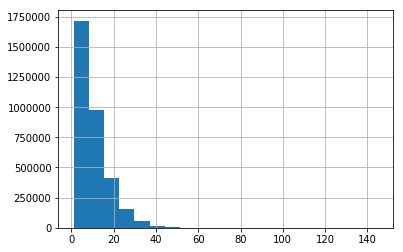

In [35]:
order_products['order_id'].value_counts().rename('counts').hist(bins=20)

AttributeError: 'Series' object has no attribute 'codes'

In [74]:
orders = orders.join(order_products['order_id'].value_counts().rename('order_size'))
orders['size_cat'] = pd.cut(orders['order_size'], [0,5,10,20,np.inf], labels=['small', 'medium', 'large', 'xl'])
orders.head()

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_size,size_cat
order_id,,,,,,,,
2539329,1,prior,1,2,8,NaN,5.0,small
2398795,1,prior,2,3,7,15.0,6.0,medium
473747,1,prior,3,3,12,21.0,5.0,small
2254736,1,prior,4,4,7,29.0,5.0,small
431534,1,prior,5,4,15,28.0,8.0,medium


In [61]:
full = order_products.join(orders, on='order_id').join(products, on='product_id').join(aisles, on='aisle_id')
print(full.columns)
full.head(10)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'order_size', 'product_name', 'aisle_id',
       'department_id', 'n_orders', 'organic', 'popular', 'aisle', 'prepared',
       'dairy', 'gluten', 'snack', 'meat', 'fish', 'beverage', 'veg'],
      dtype='object')


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,...,popular,aisle,prepared,dairy,gluten,snack,meat,fish,beverage,veg
0,1,49302,1,1,112108,train,4,4,10,9.0,...,0,yogurt,0,1,0,0,0,0,0,0
1,1,11109,2,1,112108,train,4,4,10,9.0,...,0,other creams cheeses,0,1,0,0,0,0,0,0
2,1,10246,3,0,112108,train,4,4,10,9.0,...,0,fresh vegetables,0,0,0,0,0,0,0,1
3,1,49683,4,0,112108,train,4,4,10,9.0,...,0,fresh vegetables,0,0,0,0,0,0,0,1
4,1,43633,5,1,112108,train,4,4,10,9.0,...,0,canned meat seafood,1,0,0,0,1,1,0,0
5,1,13176,6,0,112108,train,4,4,10,9.0,...,1,fresh fruits,0,0,0,0,0,0,0,1
6,1,47209,7,0,112108,train,4,4,10,9.0,...,1,fresh fruits,0,0,0,0,0,0,0,1
7,1,22035,8,1,112108,train,4,4,10,9.0,...,1,packaged cheese,1,1,0,0,0,0,0,0
8,36,39612,1,0,79431,train,23,6,18,30.0,...,0,specialty cheeses,0,1,0,0,0,0,0,0
9,36,19660,2,1,79431,train,23,6,18,30.0,...,1,water seltzer sparkling water,0,0,0,0,0,0,1,0


In [48]:
full['aisle'].value_counts().head()

fresh fruits                  3792661
fresh vegetables              3568630
packaged vegetables fruits    1843806
yogurt                        1507583
packaged cheese               1021462
Name: aisle, dtype: int64

In [37]:
users = orders.groupby('user_id').size().reset_index(name='n_orders').set_index('user_id')
users.head()

,n_orders
user_id,
1,11
2,15
3,13
4,6
5,5


In [38]:
dow_counts = orders.pivot_table(index='user_id', columns='order_dow', values='order_number', aggfunc='count')
dow_counts.columns = ['n_dow_{}'.format(col) for col in dow_counts.columns]

In [42]:
users = users.join(dow_counts.fillna(0))
users.head()

,n_orders,n_dow_0,n_dow_1,n_dow_2,n_dow_3,n_dow_4,n_dow_5,n_dow_6
user_id,,,,,,,,
1,11,0.0,3.0,2.0,2.0,4.0,0.0,0.0
2,15,0.0,6.0,5.0,2.0,1.0,1.0,0.0
3,13,6.0,2.0,1.0,3.0,0.0,1.0,0.0
4,6,0.0,0.0,0.0,1.0,2.0,2.0,1.0
5,5,2.0,1.0,0.0,2.0,0.0,0.0,0.0


In [69]:
hod_counts = orders.pivot_table(index='user_id',columns='order_hour_of_day',
                                values='order_number', aggfunc='count')
hod_counts.columns = ['n_hod_{}'.format(col) for col in hod_counts.columns]

In [70]:
users = users.join(hod_counts.fillna(0))
users.head()

,n_orders,n_dow_0,n_dow_1,n_dow_2,n_dow_3,n_dow_4,n_dow_5,n_dow_6,order_size_mean,order_size_std,...,n_hod_14,n_hod_15,n_hod_16,n_hod_17,n_hod_18,n_hod_19,n_hod_20,n_hod_21,n_hod_22,n_hod_23
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,0.0,3.0,2.0,2.0,4.0,0.0,0.0,6.363636,2.110579,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15,0.0,6.0,5.0,2.0,1.0,1.0,0.0,15.066667,7.055562,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13,6.0,2.0,1.0,3.0,0.0,1.0,0.0,7.333333,2.103388,...,1.0,3.0,4.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,1.0,2.0,2.0,1.0,3.600000,2.073644,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2.0,1.0,0.0,2.0,0.0,0.0,0.0,9.200000,2.683282,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [40]:
order_size_stats = orders.groupby('user_id').agg({'order_size': [np.mean, np.std, np.max, np.min]})
order_size_stats.columns = ['_'.join(col).strip() for col in order_size_stats.columns.values]

In [44]:
users = users.join(order_size_stats)
users.head()

,n_orders,n_dow_0,n_dow_1,n_dow_2,n_dow_3,n_dow_4,n_dow_5,n_dow_6,order_size_mean,order_size_std,order_size_amax,order_size_amin
user_id,,,,,,,,,,,,
1,11,0.0,3.0,2.0,2.0,4.0,0.0,0.0,6.363636,2.110579,11.0,4.0
2,15,0.0,6.0,5.0,2.0,1.0,1.0,0.0,15.066667,7.055562,31.0,5.0
3,13,6.0,2.0,1.0,3.0,0.0,1.0,0.0,7.333333,2.103388,11.0,5.0
4,6,0.0,0.0,0.0,1.0,2.0,2.0,1.0,3.600000,2.073644,7.0,2.0
5,5,2.0,1.0,0.0,2.0,0.0,0.0,0.0,9.200000,2.683282,12.0,5.0


In [62]:
groups = full.groupby('user_id')

In [68]:
means = groups.mean()[['days_since_prior_order', 'reordered', 'organic', 'popular'] + list(cats.keys())]
users = users.join(means)
users.head()

,n_orders,n_dow_0,n_dow_1,n_dow_2,n_dow_3,n_dow_4,n_dow_5,n_dow_6,order_size_mean,order_size_std,...,organic,popular,prepared,dairy,gluten,snack,meat,fish,beverage,veg
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,0.0,3.0,2.0,2.0,4.0,0.0,0.0,6.363636,2.110579,...,0.257143,0.114286,0.314286,0.214286,0.057143,0.228571,0.185714,0.000000,0.214286,0.214286
2,15,0.0,6.0,5.0,2.0,1.0,1.0,0.0,15.066667,7.055562,...,0.247788,0.110619,0.261062,0.221239,0.110619,0.256637,0.110619,0.004425,0.013274,0.243363
3,13,6.0,2.0,1.0,3.0,0.0,1.0,0.0,7.333333,2.103388,...,0.340909,0.147727,0.306818,0.113636,0.068182,0.113636,0.000000,0.000000,0.022727,0.465909
4,6,0.0,0.0,0.0,1.0,2.0,2.0,1.0,3.600000,2.073644,...,0.111111,0.000000,0.222222,0.000000,0.111111,0.166667,0.000000,0.000000,0.166667,0.111111
5,5,2.0,1.0,0.0,2.0,0.0,0.0,0.0,9.200000,2.683282,...,0.500000,0.043478,0.304348,0.217391,0.021739,0.021739,0.021739,0.000000,0.000000,0.500000


In [82]:
users = users.join(orders.pivot_table(index='user_id', columns='size_cat',
                                      values='order_number', aggfunc='count').fillna(0))
users.head()

,n_orders,n_dow_0,n_dow_1,n_dow_2,n_dow_3,n_dow_4,n_dow_5,n_dow_6,order_size_mean,order_size_std,...,n_hod_18,n_hod_19,n_hod_20,n_hod_21,n_hod_22,n_hod_23,small,medium,large,xl
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,0.0,3.0,2.0,2.0,4.0,0.0,0.0,6.363636,2.110579,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,0.0
2,15,0.0,6.0,5.0,2.0,1.0,1.0,0.0,15.066667,7.055562,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,8.0,3.0
3,13,6.0,2.0,1.0,3.0,0.0,1.0,0.0,7.333333,2.103388,...,2.0,1.0,0.0,0.0,0.0,0.0,3.0,8.0,1.0,0.0
4,6,0.0,0.0,0.0,1.0,2.0,2.0,1.0,3.600000,2.073644,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0
5,5,2.0,1.0,0.0,2.0,0.0,0.0,0.0,9.200000,2.683282,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0
